In [41]:
import pgntrain
import importlib
importlib.reload(pgntrain)
import tensorflow as tf
import keras.activations
from livelossplot import PlotLossesKeras
print(f"TensorFlow has access to the following devices:\n{tf.config.list_physical_devices()}")


TensorFlow has access to the following devices:
[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU'), PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


In [19]:
pgnfile = ['lichess_db_standard_rated_2024-01.pgn.zst', 'lichess_db_standard_rated_2024-02.pgn.zst']
validation_pgn = 'lichess_db_standard_rated_2024-03.50M.pgn'


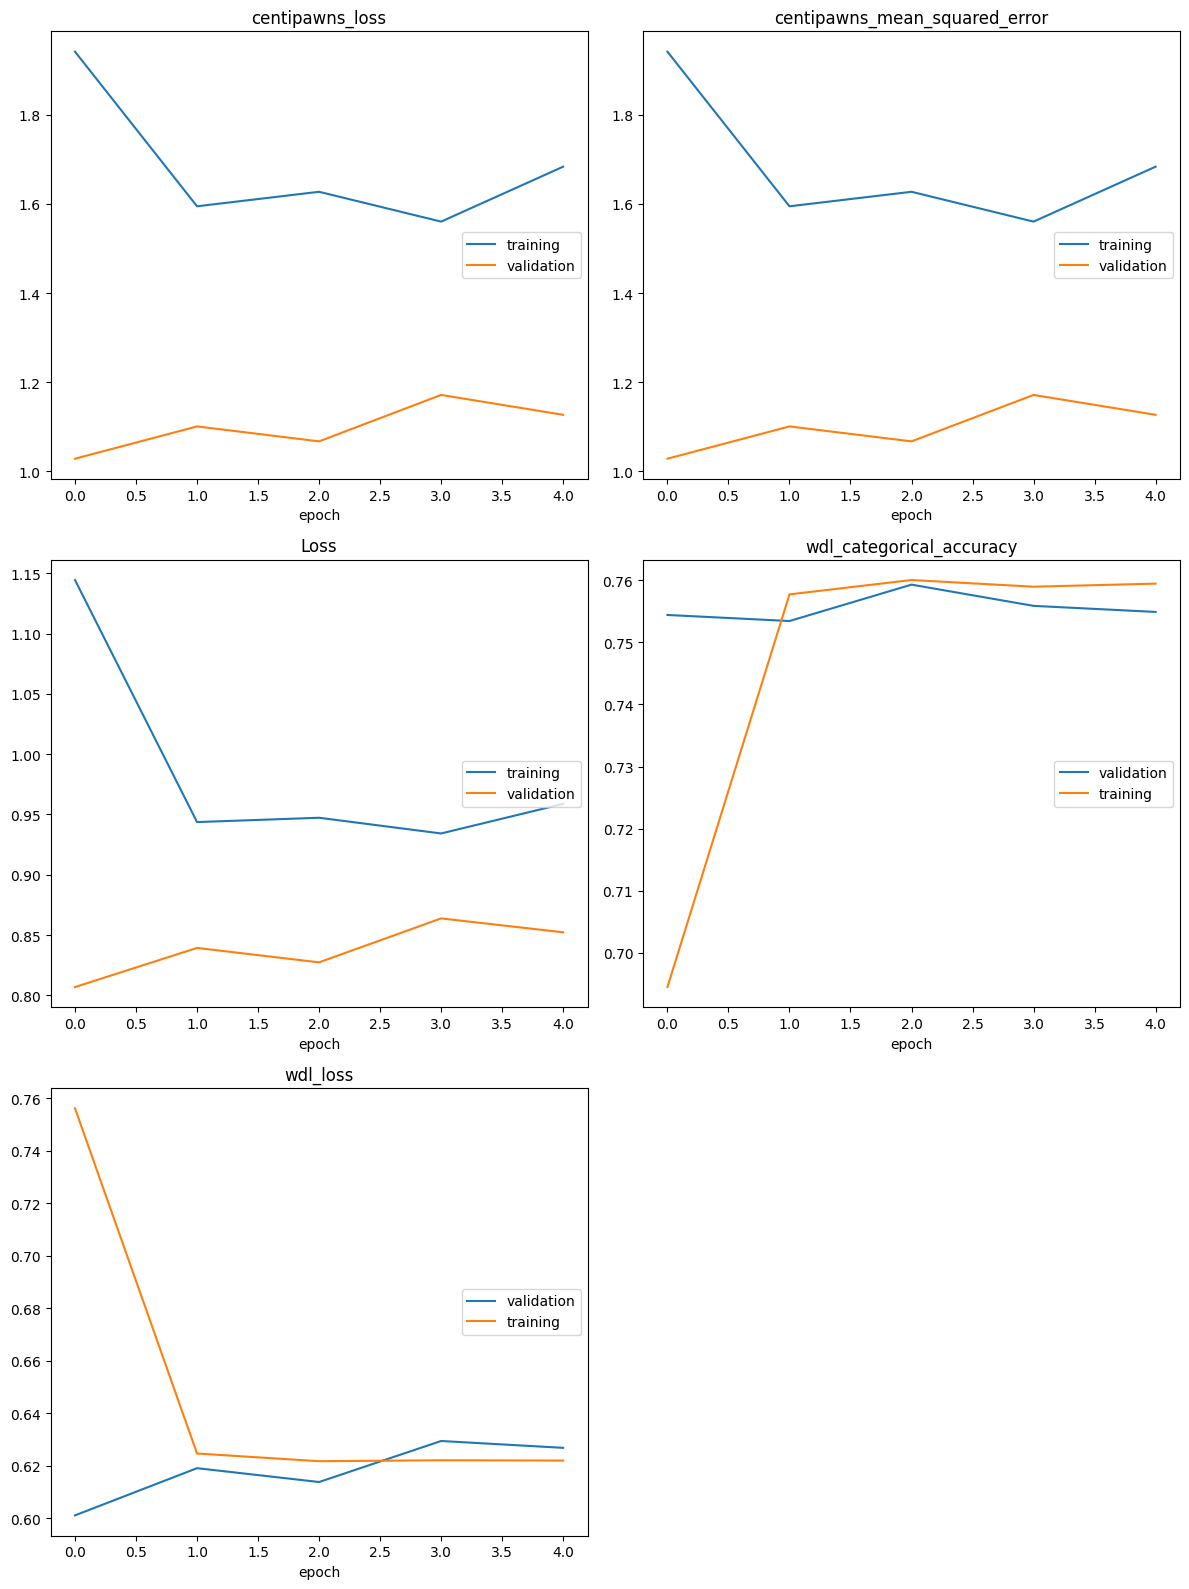

centipawns_loss
	training         	 (min:    1.560, max:    1.942, cur:    1.684)
	validation       	 (min:    1.028, max:    1.171, cur:    1.127)
centipawns_mean_squared_error
	training         	 (min:    1.560, max:    1.942, cur:    1.684)
	validation       	 (min:    1.028, max:    1.171, cur:    1.127)
Loss
	training         	 (min:    0.934, max:    1.144, cur:    0.959)
	validation       	 (min:    0.807, max:    0.864, cur:    0.852)
wdl_categorical_accuracy
	validation       	 (min:    0.753, max:    0.759, cur:    0.755)
	training         	 (min:    0.695, max:    0.760, cur:    0.759)
wdl_loss
	validation       	 (min:    0.601, max:    0.629, cur:    0.627)
	training         	 (min:    0.622, max:    0.756, cur:    0.622)
4096/4096 - 63s - 15ms/step - centipawns_loss: 1.6836 - centipawns_mean_squared_error: 1.6836 - loss: 0.9588 - val_centipawns_loss: 1.1269 - val_centipawns_mean_squared_error: 1.1269 - val_loss: 0.8523 - val_wdl_categorical_accuracy: 0.7549 - val_wdl_loss

In [20]:

size = 16
layers = 0
n = pgntrain.PTSOnly(num_hidden_layers=0, half_len_concat=size)
model = n.train(pgnfile, validation_pgn, profile=False, batch_size=256, validation_steps=8, steps_per_epoch=4096, epochs=5, callbacks=[PlotLossesKeras()], verbose=2)
model.save(f'pts-{size}.keras')


In [32]:
model.get_layer('pts').kernel.numpy()[3840:4480,0]

array([ 1.        ,  1.        ,  1.        ,  1.        ,  1.        ,
        1.        ,  1.        ,  1.        ,  1.671552  ,  1.8313215 ,
        1.231782  ,  1.0530541 ,  0.7442706 ,  0.8363804 ,  1.0154556 ,
        0.94999456,  1.5387183 ,  1.5358845 ,  0.79625815,  0.962943  ,
        0.9772707 ,  0.8699594 ,  0.88596916,  0.6908675 ,  1.2460994 ,
        1.2225866 ,  0.9011568 ,  0.9597161 ,  1.1248301 ,  0.9279978 ,
        1.0446247 ,  0.7013006 ,  1.3219081 ,  1.0340462 ,  0.9481612 ,
        1.0522552 ,  1.0464755 ,  1.0459031 ,  0.98198867,  0.8464647 ,
        1.3950266 ,  1.2713429 ,  1.33988   ,  1.3315333 ,  1.4587103 ,
        1.4316752 ,  1.1724586 ,  1.0938377 ,  1.0053339 ,  1.1389593 ,
        1.3903048 ,  1.6493618 ,  1.7508487 ,  1.6237979 ,  1.6399354 ,
        1.9012665 ,  1.        ,  1.        ,  1.        ,  1.        ,
        1.        ,  1.        ,  1.        ,  1.        ,  2.3635023 ,
        3.        ,  3.1807234 ,  2.892739  ,  2.8107023 ,  2.70

In [42]:

size = 16
layers = 1
n = pgntrain.PTSOnly(num_hidden_layers=layers, half_len_concat=size)
model = n.train(pgnfile, validation_pgn, profile=False, batch_size=256, validation_steps=8, steps_per_epoch=4096, epochs=5, callbacks=[PlotLossesKeras()], verbose=2)
model.save(f'pts-{layers}-{size}.keras')


Model: "lobsternet_nnue"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ side_0 (InputLayer) │ (None, 40960)     │          0 │ -                 │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ side_1 (InputLayer) │ (None, 40960)     │          0 │ -                 │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ inter_1 (Dense)     │ (None, 32)        │  1,310,752 │ side_0[0][0],     │
│                     │                   │            │ side_1[0][0]      │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ pts (Dense)         │ (None, 1)         │         33 │ inter_1[0][0],    │
│                     │                   │            │ inter_1[1][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ subtract_8          │ (None, 1)         │          0 │ pts[0][0],        │
│ (Subtract)          │                   │            │ pts[1][0]         │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ multiply_8          │ (None, 1)         │          0 │ subtract_8[0][0]  │
│ (Multiply)          │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ wdl (Dense)         │ (None, 3)         │          6 │ multiply_8[0][0]  │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ centipawns (Dense)  │ (None, 1)         │          2 │ multiply_8[0][0]  │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 1,310,793 (5.00 MB)

 Trainable params: 1,310,793 (5.00 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/5


ValueError: Exception encountered when calling Dense.call().

[1mDimensions must be equal, but are 32 and 40960 for '{{node lobsternet_nnue_1/pts_1/MatMul}} = MatMul[T=DT_FLOAT, grad_a=false, grad_b=false, transpose_a=false, transpose_b=false](lobsternet_nnue_1/inter_1_3/clip_by_value, lobsternet_nnue_1/pts_1/Cast/ReadVariableOp)' with input shapes: [?,32], [40960,1].[0m

Arguments received by Dense.call():
  • inputs=tf.Tensor(shape=(None, 32), dtype=float32)
  • training=True

In [36]:
model.summary()

Model: "lobsternet_nnue"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ side_0 (InputLayer) │ (None, 40960)     │          0 │ -                 │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ side_1 (InputLayer) │ (None, 40960)     │          0 │ -                 │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ pts (Dense)         │ (None, 1)         │     40,961 │ side_0[0][0],     │
│                     │                   │            │ side_1[0][0]      │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ subtract_5          │ (None, 1)         │          0 │ pts[0][0],        │
│ (Subtract)          │                   │            │ pts[1][0]         │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ multiply_5          │ (None, 1)         │          0 │ subtract_5[0][0]  │
│ (Multiply)          │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ hidden_1 (Dense)    │ (None, 32)        │         64 │ multiply_5[0][0]  │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ wdl (Dense)         │ (None, 3)         │         99 │ hidden_1[0][0]    │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ centipawns (Dense)  │ (None, 1)         │         33 │ hidden_1[0][0]    │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 123,473 (482.32 KB)

 Trainable params: 41,157 (160.77 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 82,316 (321.55 KB)